In [1]:
# импортируем библиотеки numpy и pandas
import pandas as pd
import numpy as np

# импортируем библиотеку datetime для работы с датами
from datetime import datetime, date

# Задаем некоторые опции библиотеки pandas, которые настраивают вывод
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 10) 
pd.set_option('display.max_rows', 15)
pd.set_option('display.width', 90)

# импортируем библиотеку matplotlib для построения графиков
import matplotlib.pyplot as plt
%matplotlib inline

#### Объекты datetime, day и time

In [2]:
# объект datetime для 15 декабря 2014 года
datetime(2014, 12, 15)

datetime.datetime(2014, 12, 15, 0, 0)

In [3]:
# задаем конкретную дату, а также время 17:30
datetime(2014, 12, 15, 17, 30)

datetime.datetime(2014, 12, 15, 17, 30)

In [4]:
# получаем текущие дату и время для местного часового пояса
datetime.now()

datetime.datetime(2025, 2, 13, 17, 19, 16, 376000)

Объект **datetime.date** представляет определенный день без компонента времени.
Его можно создать, **передав объект datetime** конструктору класса date

In [5]:
# можно записать дату без компонента времени, создав дату с помощью объекта datetime
datetime.date(datetime(2024, 11, 25))

datetime.date(2024, 11, 25)

In [6]:
# просто извлекаем текущую дату
datetime.now().date()

datetime.date(2025, 2, 13)

#### Создание временной метки с помощью объекта Timestamp

В библиотеке pandas дату и время можно представить с помощью класса pandas.
**tslib.Timestamp**. 

Объект библиотеки pandas Timestamp основан на типе NumPy date-time64 и имеет более высокую точность, чем питоновский объект datetime. **В библиотеке pandas объекты Timestamp и объекты datetime обычно взаимозаменяемы**, поэтому вы можете использовать объекты Timestamp везде, где можно применять объекты datetime.


Вы можете создать объект Timestamp с помощью <mark>pd.Timestamp</mark> (ярлык для pandas.
tslib.Timestamp), передав строку, представляющую дату, время или дату и время

In [7]:
# временная метка, представляющая конкретную дату
pd.Timestamp('2014-12-15')

Timestamp('2014-12-15 00:00:00')

In [8]:
# временная метка, содержащая дату и время
pd.Timestamp('2014-12-15 17:30')

Timestamp('2014-12-15 17:30:00')

In [9]:
# задаем временную метку, указав только время по умолчанию, ко времени будет добавлена
# местная текущая дата
pd.Timestamp('17:30')

Timestamp('2025-02-13 17:30:00')

In [10]:
# получаем текущие дату и время
pd.Timestamp('now')

Timestamp('2025-02-13 17:19:16.451412')

#### Использование объекта Timedelta для представления временного интервала

Для представления разности между двумя моментами времени используется объект библиотеки pandas <mark>Timedelta</mark>. Он применяется для вычисления временного интервала между двумя датами или для вычисления даты, отстоящей от другой даты и/или времени на определенный промежуток времени. 

In [11]:
# вычисляем дату, которая будет отстоять от даты 2014-11-30 на один день вперед
today = datetime(2014, 11, 30)
tomorrow = today + pd.Timedelta(days=1)
tomorrow

datetime.datetime(2014, 12, 1, 0, 0)

In [12]:
# вычисляем количество дней между двумя датами
date1 = datetime(2014, 12, 2)
date2 = datetime(2014, 11, 28)
date1 - date2

datetime.timedelta(days=4)

### Введение во временные ряды

#### Индексация с помощью объекта DatetimeIndex
В основе работы с временными рядами лежит использование специализированных индексов.
Эти индексы представляют собой измерения данных, зафиксированные по одной или нескольким временным меткам. В библиотеке pandas они являются объектами DatetimeIndex. 


In [13]:
# создаем очень простой временной ряд с двумя индексными метками и случайными значениями
dates = [datetime(2014, 8, 1), datetime(2014, 8, 2)]
ts = pd.Series(np.random.rand(2), dates)
ts

2014-08-01    0.597599
2014-08-02    0.435191
dtype: float64

Мы взяли объекты datetime и создали на основе дат объект DatetimeIndex.
Каждое значение этого индекса является объектом Timestamp.

In [14]:
# смотрим тип индекса
type(ts.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [15]:
# можно увидеть, что это коллекция временных меток (Timestamp)
type(ts.index[0])

pandas._libs.tslibs.timestamps.Timestamp

**Чтобы создать временной ряд, необязательно передавать список объектов datetime**.
Объект Series достаточно умен, чтобы распознать строку как объект datetime
и выполнить преобразование за вас.

In [16]:
# создаем временной ряд из списка дат, записанных в виде строк!
np.random.seed(123456)
dates = ['2014-08-01', '2014-08-02']
ts = pd.Series(np.random.rand(2), dates)
ts

2014-08-01    0.126970
2014-08-02    0.966718
dtype: float64

Библиотека pandas предлагает удобную функцию <mark>pd.to_datetime()</mark>. Она принимает
в качестве аргумента последовательность объектов одного и того же или
смешанного типа, преобразует их в объекты Timestamp, а те, в свою очередь,
сформируют объект DatetimeIndex. Если объект, записанный в последовательности, не
удается преобразовать, библиотека pandas создает значение NaT, то есть значение
не является временем (Not-a-Time)

In [17]:
# преобразовываем последовательность объектов в объект DatetimeIndex
dti = pd.to_datetime(['Aug 1, 2014', '2014-08-02', '2014.8.3', None], format='mixed')
for l in dti:
    print(l)


2014-08-01 00:00:00
2014-08-02 00:00:00
2014-08-03 00:00:00
NaT


In [18]:
# принудительно выполняем преобразование, значения, которые
# не удалось преобразовать, получат значения NaT
pd.to_datetime(['Aug 1, 2014', 'foo'], errors='coerce')

DatetimeIndex(['2014-08-01', 'NaT'], dtype='datetime64[ns]', freq=None)

C помощью функции <mark>pd.date_range()</mark> можно легко создать **диапазон временных
меток с определенной частотой**.

In [19]:
# создаем диапазон дат, начинающийся с определенной даты и включающий определенное
# количество дней, на его основе создаем объект Series
np.random.seed(123456)
periods = pd.date_range('8/1/2024', periods=10)
date_series = pd.Series(np.random.randn(10), index=periods)
date_series

2024-08-01    0.469112
2024-08-02   -0.282863
2024-08-03   -1.509059
2024-08-04   -1.135632
2024-08-05    1.212112
2024-08-06   -0.173215
2024-08-07    0.119209
2024-08-08   -1.044236
2024-08-09   -0.861849
2024-08-10   -2.104569
Freq: D, dtype: float64

In [20]:
# создаем срез, используя позиции индекса
subset = date_series[3:7]
subset

2024-08-04   -1.135632
2024-08-05    1.212112
2024-08-06   -0.173215
2024-08-07    0.119209
Freq: D, dtype: float64

In [21]:
# создаем объект Series для иллюстрации выравнивания
s2 = pd.Series([10, 100, 1000, 10000], index=subset.index)
s2

2024-08-04       10
2024-08-05      100
2024-08-06     1000
2024-08-07    10000
Freq: D, dtype: int64

Когда мы складываем date_series и s2 вместе, **выполняется выравнивание**, возвращающее
значения NaN там, где элементы невозможно выровнять.

Значение напротив определенной метки индекса – это сумма значений, найденных
в соответствующих индексных метках объектов date_series и s2

In [22]:
# демонстрируем выравнивание по дате, сложив вместе date_series и s2
date_series + s2

2024-08-01             NaN
2024-08-02             NaN
2024-08-03             NaN
2024-08-04        8.864368
2024-08-05      101.212112
2024-08-06      999.826785
2024-08-07    10000.119209
2024-08-08             NaN
2024-08-09             NaN
2024-08-10             NaN
Freq: D, dtype: float64

**Элементы серии с типом DatetimeIndex можно извлечь с помощью строкового
представления даты**, не указывая объекта datetime

In [23]:
# находим элемент с помощью строкового представления даты
date_series['2024-08-05']

1.2121120250208506

In [24]:
# создаем срез объекта DatetimeIndex, задав диапазон из строковых представлений дат
date_series['2024-08-05':'2024-08-07']

2024-08-05    1.212112
2024-08-06   -0.173215
2024-08-07    0.119209
Freq: D, dtype: float64

In [25]:
# создаем диапазон дат, охватывающий 2-летний период с ежедневным интервалом
# отбираем лишь те даты, которые относятся к 2013 году
s3 = pd.Series(0, pd.date_range('2013-01-01', '2014-12-31'))
s3['2013']

2013-01-01    0
2013-01-02    0
2013-01-03    0
2013-01-04    0
2013-01-05    0
             ..
2013-12-27    0
2013-12-28    0
2013-12-29    0
2013-12-30    0
2013-12-31    0
Freq: D, Length: 365, dtype: int64

In [26]:
# отбираем данные за май 2014 года
s3['2013-05']

2013-05-01    0
2013-05-02    0
2013-05-03    0
2013-05-04    0
2013-05-05    0
             ..
2013-05-27    0
2013-05-28    0
2013-05-29    0
2013-05-30    0
2013-05-31    0
Freq: D, Length: 31, dtype: int64

In [27]:
# извлекаем даты с августа по сентябрь 2014 года
s3['2014-08':'2014-09']

2014-08-01    0
2014-08-02    0
2014-08-03    0
2014-08-04    0
2014-08-05    0
             ..
2014-09-26    0
2014-09-27    0
2014-09-28    0
2014-09-29    0
2014-09-30    0
Freq: D, Length: 61, dtype: int64

#### Создание временного ряда с определенной частотой
C помощью функции pd.date_range() и параметра **freq** можно
сгенерировать различные частоты.

In [28]:
# создаем объект Series, состоящий из 1-минутных интервалов
np.random.seed(123456)
bymin = pd.Series(np.random.randn(24*60*90),
                 pd.date_range('2014-08-01', '2014-10-29 23:59', freq='min'))
bymin

2014-08-01 00:00:00    0.469112
2014-08-01 00:01:00   -0.282863
2014-08-01 00:02:00   -1.509059
2014-08-01 00:03:00   -1.135632
2014-08-01 00:04:00    1.212112
                         ...   
2014-10-29 23:55:00   -0.563029
2014-10-29 23:56:00    1.180497
2014-10-29 23:57:00    1.850604
2014-10-29 23:58:00   -1.589660
2014-10-29 23:59:00    0.266429
Freq: min, Length: 129600, dtype: float64

In [29]:
# создаем срез с поминутными интервалами
bymin['2014-08-01 00:02':'2014-08-01 00:07']

2014-08-01 00:02:00   -1.509059
2014-08-01 00:03:00   -1.135632
2014-08-01 00:04:00    1.212112
2014-08-01 00:05:00   -0.173215
2014-08-01 00:06:00    0.119209
2014-08-01 00:07:00   -1.044236
Freq: min, dtype: float64

In [30]:
# создаем серию, состоящую из рабочих дней
days = pd.date_range('2014-08-29', '2014-09-05', freq='B')
days

DatetimeIndex(['2014-08-29', '2014-09-01', '2014-09-02', '2014-09-03', '2014-09-04',
               '2014-09-05'],
              dtype='datetime64[ns]', freq='B')

С помощью параметра **periods** можно создать диапазон, начинающийся с определенной
даты и времени, с определенной частотой и с **определенным количеством периодов**.

In [31]:
# задаем периоды (интервал в 1 сек.)
pd.date_range('2014-08-01 12:10:01', freq='s', periods=5)

DatetimeIndex(['2014-08-01 12:10:01', '2014-08-01 12:10:02', '2014-08-01 12:10:03',
               '2014-08-01 12:10:04', '2014-08-01 12:10:05'],
              dtype='datetime64[ns]', freq='s')

### Вычисление новых дат с помощью смещений
В библиотеке pandas для каждой базовой частоты определен объект, называемый
смещением даты (data offset).

Библиотека pandas расширяет эти возможности с помощью объекта DateOffset.
Объекты **DataOffset** содержат информацию о смещении времени и частоте,
которую можно использовать для изменения объектов DatetimeIndex.

#### Представление временных интервалов с помощью смещений дат (стр. 272)
Практическим примером является вычисление следующего рабочего дня. Его
нельзя определить, просто добавив один день к объекту datetime. Если дата представляет собой пятницу, следующий рабочий день на финансовом рынке США –
это не суббота, а понедельник. А в некоторых случаях следующим рабочим днем
после пятницы может быть вторник, если понедельник – это праздничный день.
Библиотека pandas предлагает нам все инструменты, необходимые для работы
с такими сложными сценариями.

In [32]:
# извлекаем все рабочие дни в промежутке между двумя датами, включая эти даты
dti = pd.date_range('2014-08-29', '2014-09-05', freq='B')
dti, dti.values

(DatetimeIndex(['2014-08-29', '2014-09-01', '2014-09-02', '2014-09-03', '2014-09-04',
                '2014-09-05'],
               dtype='datetime64[ns]', freq='B'),
 array(['2014-08-29T00:00:00.000000000', '2014-09-01T00:00:00.000000000',
        '2014-09-02T00:00:00.000000000', '2014-09-03T00:00:00.000000000',
        '2014-09-04T00:00:00.000000000', '2014-09-05T00:00:00.000000000'],
       dtype='datetime64[ns]'))

**Объект DatetimeIndex имеет свойство .freq**, которое позволяет узнать частоту
временных меток в индексе

In [33]:
# убеждаемся, что частотой является рабочий день
dti.freq

<BusinessDay>

In [34]:
# вычисляем однодневное смещение для 2014-8-29
d = datetime(2014, 8, 29)
do = pd.DateOffset(days = 1)
d + do

Timestamp('2014-08-30 00:00:00')

In [35]:
# импортируем типы смещений дат
from pandas.tseries.offsets import *
# dir(pd.tseries.offsets)

# вычисляем дату, отстоящую от 2014-8-31 на один рабочий день вперед
d + BusinessDay()

Timestamp('2014-09-01 00:00:00')

In [36]:
# вычисляем дату, отстоящую от 2014-8-31 на два рабочих  
d + 2 * BusinessDay()

Timestamp('2014-09-02 00:00:00')

In [37]:
# вычисляем последний рабочий день месяца, следующий после 2014-09-02
d + BMonthEnd()

Timestamp('2014-09-30 00:00:00')

In [38]:
# вычисляем последний рабочий день месяца, следующий после 2014-09-15
BMonthEnd().rollforward(datetime(2014, 9, 15))

Timestamp('2014-09-30 00:00:00')

Некоторые классы, задающие смещения, можно использовать в качестве параметров,
чтобы точнее настроить сдвиг даты. В качестве примера следующий программный
код вычисляет дату вторника (weekday=1), предшествующую дате 2014-08-31

In [39]:
# вычисляем дату вторника, предшествующую заданной дате
d - Week(weekday = 1)

Timestamp('2014-08-26 00:00:00')

#### Привязанные смещения
**Привязанные смещения** – это определенные частоты, которые начинаются с
определенного момента времени, например с определенного дня недели, месяца или
года. Для привязанных смещений используются заранее определенные сокращения.

In [40]:
# вычисляем все среды в промежутке между 2014-06-01 и 2014-08-31
wednesdays = pd.date_range('2014-06-01', '2014-07-31', freq='W-WED')
wednesdays.values

array(['2014-06-04T00:00:00.000000000', '2014-06-11T00:00:00.000000000',
       '2014-06-18T00:00:00.000000000', '2014-06-25T00:00:00.000000000',
       '2014-07-02T00:00:00.000000000', '2014-07-09T00:00:00.000000000',
       '2014-07-16T00:00:00.000000000', '2014-07-23T00:00:00.000000000',
       '2014-07-30T00:00:00.000000000'], dtype='datetime64[ns]')

Привязанные смещения еще можно создать с помощью ежегодных и ежеквартальных частот.
Эти привязанные частоты имеют общий вид [B][A|Q][S]-[MON], где 
B (рабочие дни) и S (начало периода вместо конца) задаются по желанию, 
A – частота ежегодно или Q – частота ежеквартально, а MON – трехзначная аббревиатура
для месяца (JAN, FEB, ...).

In [41]:
# вычисляем первый рабочий день последнего месяца в каждом квартале
qends = pd.date_range('2014-01-01', '2014-12-31', freq='BQS-JUN')
qends

DatetimeIndex(['2014-03-03', '2014-06-02', '2014-09-01', '2014-12-01'], dtype='datetime64[ns]', freq='BQS-JUN')

#### Представление промежутков времени с помощью объектов Period
Многие операции над временными рядами требуют анализа событий за определенный
промежуток времени. **Простой пример – определение количества финансовых транзакций
за определенный период.**

Данный вид анализа можно выполнить с помощью объектов Timestamp и DateOffset,
когда сначала задаются границы временного интервала, а затем определяется
частота. Однако этот способ становится громоздким, когда вам нужно
сгруппировать события в несколько периодов времени, поскольку в таком случае
вам придется работать с наборами объектов Timestamp и DateOffset.

**Чтобы упростить организацию и анализ таких данных, библиотека pandas
позволяет создавать интервалы времени как формальную конструкцию с помощью
класса Period.** Кроме того, библиотека pandas формализует работу с рядом объектов
Period с помощью класса PeriodIndex, который позволяет выравнивать элементы
данных на основе индексов соответствующих объектов Period.

#### Создание временного интервала с помощью объекта Period
Библиотека pandas формализует понятие временного интервала с помощью объекта Period.
Объект Period позволяет вам задать промежутки времени, исходя из различных
частот (ежедневной, еженедельной, ежемесячной, ежеквартальной, ежегодной и т. д.). 
При этом он будет включать в себя начальную и конечную временные метки,
задающие определенный интервал времени.

**Объект Period можно создать с помощью временной метки и частоты, при этом временная
метка представляет собой «якорь», используемый в качестве точки отсчета,
а частота – это продолжительность времени.**

In [42]:
# создаем период – один месяц, начинающийся в августе 2014 года
aug2014 = pd.Period('2014-08', freq='M')
aug2014

Period('2014-08', 'M')

Cвойства **start_time** и **end_time** объекта Period сообщают нам о начальной 
и конечной временных метках

In [43]:
# смотрим начальную и конечную даты этого периода
aug2014.start_time, aug2014.end_time

(Timestamp('2014-08-01 00:00:00'), Timestamp('2014-08-31 23:59:59.999999999'))

In [44]:
# вычисляем период, прибавив к периоду aug2014 единицу частоты (один месяц),
# теперь периодом будет сентябрь 2014 года
sep2014 = aug2014 + 1
sep2014

Period('2014-09', 'M')

**Понятие сдвига является очень важным.** Прибавление 1 к объекту Period
информирует последний о том, что нужно осуществить сдвиг на одну
положительную единицу частоты периода. В данном случае мы сдвигаем период
на один месяц вперед, чтобы получить новый период – сентябрь 2014 года.

In [45]:
# объект Period учитывает, что сентябрь состоит из
# 30 дней, а не из 31. «Интеллектуальные возможности» объекта Period позволяют
# сэкономить время, затрачиваемое на ввод дополнительного программного кода
sep2014.start_time, sep2014.end_time

(Timestamp('2014-09-01 00:00:00'), Timestamp('2014-09-30 23:59:59.999999999'))

#### Индексация с помощью объекта PeriodIndex
Серию объектов Period можно объединить в специальный тип индекса, известный
как PeriodIndex.

**Индекс PeriodIndex применяется в том случае, когда данные нужно
связать с определенными временными интервалами, создать срезы
и проанализировать события в каждом интервале.**

In [46]:
# создаем объект PeriodIndex, состоящий из 1-месячных интервалов 2013 года
mp2013 = pd.period_range('1/1/2013', '12/31/2013', freq='M')
mp2013

PeriodIndex(['2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06', '2013-07',
             '2013-08', '2013-09', '2013-10', '2013-11', '2013-12'],
            dtype='period[M]')

**PeriodIndex отличается от DatetimeIndex тем, что индексные метки являются объектами Period.**

In [47]:
# пробегаем по всем объектам Period в индексе, печатая
# начальную и конечную даты для каждого объекта
for p in mp2013:
    print(f'{p.start_time, p.end_time}')

(Timestamp('2013-01-01 00:00:00'), Timestamp('2013-01-31 23:59:59.999999999'))
(Timestamp('2013-02-01 00:00:00'), Timestamp('2013-02-28 23:59:59.999999999'))
(Timestamp('2013-03-01 00:00:00'), Timestamp('2013-03-31 23:59:59.999999999'))
(Timestamp('2013-04-01 00:00:00'), Timestamp('2013-04-30 23:59:59.999999999'))
(Timestamp('2013-05-01 00:00:00'), Timestamp('2013-05-31 23:59:59.999999999'))
(Timestamp('2013-06-01 00:00:00'), Timestamp('2013-06-30 23:59:59.999999999'))
(Timestamp('2013-07-01 00:00:00'), Timestamp('2013-07-31 23:59:59.999999999'))
(Timestamp('2013-08-01 00:00:00'), Timestamp('2013-08-31 23:59:59.999999999'))
(Timestamp('2013-09-01 00:00:00'), Timestamp('2013-09-30 23:59:59.999999999'))
(Timestamp('2013-10-01 00:00:00'), Timestamp('2013-10-31 23:59:59.999999999'))
(Timestamp('2013-11-01 00:00:00'), Timestamp('2013-11-30 23:59:59.999999999'))
(Timestamp('2013-12-01 00:00:00'), Timestamp('2013-12-31 23:59:59.999999999'))


In [48]:
# создаем объект Series, у которого индексом будет PeriodIndex
np.random.seed(123456)
ps = pd.Series(np.random.randn(12), mp2013)
ps[:5]

2013-01    0.469112
2013-02   -0.282863
2013-03   -1.509059
2013-04   -1.135632
2013-05    1.212112
Freq: M, dtype: float64

In [49]:
# создаем объект Series с индексом PeriodIndex, который представляет собой все календарные
# месяцы-периоды 2013 и 2014 годов
np.random.seed(123456)
ps = pd.Series(np.random.randn(24),
               pd.period_range('1/1/2013','12/31/2014', freq='M'))
ps

2013-01    0.469112
2013-02   -0.282863
2013-03   -1.509059
2013-04   -1.135632
2013-05    1.212112
             ...   
2014-08   -1.087401
2014-09   -0.673690
2014-10    0.113648
2014-11   -1.478427
2014-12    0.524988
Freq: M, Length: 24, dtype: float64

In [50]:
# извлекаем значение, соответствующее периоду 2014-06
ps['2014-06']

0.567020349793672

In [51]:
# извлекаем значения для всех периодов в 2014 году
ps['2014']

2014-01    0.721555
2014-02   -0.706771
2014-03   -1.039575
2014-04    0.271860
2014-05   -0.424972
2014-06    0.567020
2014-07    0.276232
2014-08   -1.087401
2014-09   -0.673690
2014-10    0.113648
2014-11   -1.478427
2014-12    0.524988
Freq: M, dtype: float64

In [52]:
# извлекаем все значения, соответствующие периодам с марта по июнь 2014 года включительно
ps['2014-03':'2014-06']

2014-03   -1.039575
2014-04    0.271860
2014-05   -0.424972
2014-06    0.567020
Freq: M, dtype: float64

#### Обработка праздников с помощью календарей (стр. 280)

In [53]:
# демонстрируем использование календаря федеральных праздников США
# сначала нужно импортировать его
from pandas.tseries.holiday import USFederalHolidayCalendar

# создаем его и демонстрируем, что он учитывает праздники
cal = USFederalHolidayCalendar()
for d in cal.holidays(start='2014-01-01', end='2014-12-31'):
    print(d, type(d))

2014-01-01 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-01-20 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-02-17 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-05-26 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-07-04 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-09-01 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-10-13 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-11-11 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-11-27 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
2014-12-25 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [54]:
# создаем объект CustomBusinessDay на основе календаря федеральных праздников США
cbd = CustomBusinessDay(holidays=cal.holidays())

In [55]:
# теперь вычисляем рабочий день, следующий после 2014-8-29
datetime(2014, 8, 29) + cbd

Timestamp('2014-09-02 00:00:00')

#### Нормализация временных меток с помощью часовых поясов
Объекты, которые учитывают часовые пояса, поддерживают свойство **.tz**.
По умолчанию объекты pandas, учитывающие часовые пояса, не используют объект
timezone в целях повышения скорости вычислений. 

In [56]:
# извлекаем текущее местное время и демонстрируем, что
# по умолчанию информация о часовом поясе отсутствует
now = pd.Timestamp('now')
now, now.tz is None

(Timestamp('2025-02-13 17:19:17.276022'), True)

In [57]:
# по умолчанию DatetimeIndex и его объекты Timestamps не содержат информацию о часовом поясе
rng = pd.date_range('3/6/2012 00:00', periods=15, freq='D')
rng.tz is None, rng[0].tz is None

(True, True)

Список названий стандартных часовых поясов можно получить с помощью
программного кода, приведенного ниже.

In [58]:
# импортируем стандартные часовые пояса из библиотеки pytz
from pytz import common_timezones
cc = pd.Series(common_timezones)

# выводим первые 5 часовых поясов
common_timezones[:5], cc[cc.str.contains('Moscow', regex=True)] 

(['Africa/Abidjan',
  'Africa/Accra',
  'Africa/Addis_Ababa',
  'Africa/Algiers',
  'Africa/Asmara'],
 349    Europe/Moscow
 dtype: object)

Местное UTC-время можно вычислить, воспользовавшись методом <mark>.tz_localize()</mark> объекта Timestamp и передав ему значение UTC

In [59]:
# получаем текущее время и преобразуем в UTC
now = pd.Timestamp('now')
local_now = now.tz_localize('UTC')
local_now_mos = now.tz_localize('Europe/Moscow')
now, local_now, local_now_mos

(Timestamp('2025-02-13 17:19:17.328708'),
 Timestamp('2025-02-13 17:19:17.328708+0000', tz='UTC'),
 Timestamp('2025-02-13 17:19:17.328708+0300', tz='Europe/Moscow'))

In [60]:
# преобразуем временную метку в часовой пояс US/Mountain
tstamp = pd.Timestamp('2014-08-01 12:00:00', tz='US/Mountain')
tstamp_mos = pd.Timestamp('2014-11-01 12:00:00', tz='Europe/Moscow')

tstamp, tstamp_mos

(Timestamp('2014-08-01 12:00:00-0600', tz='US/Mountain'),
 Timestamp('2014-11-01 12:00:00+0300', tz='Europe/Moscow'))

In [61]:
# создаем индекс DatetimeIndex с помощью часового пояса
rng = pd.date_range('3/6/2012 00:00:00', periods=10, freq='D', tz='US/Mountain')
rng.tz, rng[0].tz

(<DstTzInfo 'US/Mountain' LMT-1 day, 17:00:00 STD>,
 <DstTzInfo 'US/Mountain' MST-1 day, 17:00:00 STD>)

Кроме того, можно явно задать несколько часовых поясов. Следующий
программный код создает два часовых пояса (два разных объекта timezone)
и преобразует временную метку в каждый из них

In [62]:
# демонстрируем использование объектов timezone
# необходимо импортировать библиотеку pytz
import pytz

# создаем два часовых пояса
mountain_tz = pytz.timezone('US/Mountain')
eastern_tz = pytz.timezone('US/Eastern')
moscow_tz = pytz.timezone('Europe/Moscow')

# применяем оба к временной метке 'now'
mountain_tz.localize(now), eastern_tz.localize(now), moscow_tz.localize(now)

(Timestamp('2025-02-13 17:19:17.328708-0700', tz='US/Mountain'),
 Timestamp('2025-02-13 17:19:17.328708-0500', tz='US/Eastern'),
 Timestamp('2025-02-13 17:19:17.328708+0300', tz='Europe/Moscow'))

**Операции с несколькими временными рядами осуществляют выравнивание по объектам
Timestamp в индексе, учитывая информацию о часовом поясе.**

Чтобы продемонстрировать это, мы воспользуемся следующим программным кодом,
которое создает два объекта Series с индексами DatetimeIndex, каждый с одинаковой
начальной датой, одинаковым количеством периодов и одинаковой частотой, но
с разными часовыми поясами

In [63]:
# создаем два объекта Series с одинаковой начальной датой, одинаковым количеством периодов,
# одинаковой частотой, но с разными часовыми поясами
s_mountain = pd.Series(np.arange(0, 5),
                       index=pd.date_range('2014-08-01', periods=5, freq='h', tz='US/Mountain'))
s_eastern = pd.Series(np.arange(0, 5),
                        index=pd.date_range('2014-08-01', periods=5, freq="h", tz='US/Eastern'))
s_mountain, s_eastern

(2014-08-01 00:00:00-06:00    0
 2014-08-01 01:00:00-06:00    1
 2014-08-01 02:00:00-06:00    2
 2014-08-01 03:00:00-06:00    3
 2014-08-01 04:00:00-06:00    4
 Freq: h, dtype: int64,
 2014-08-01 00:00:00-04:00    0
 2014-08-01 01:00:00-04:00    1
 2014-08-01 02:00:00-04:00    2
 2014-08-01 03:00:00-04:00    3
 2014-08-01 04:00:00-04:00    4
 Freq: h, dtype: int64)

In [64]:
# складываем два объекта Series. В итоге происходит выравнивание только трех элементов
s_eastern + s_mountain

2014-08-01 04:00:00+00:00    NaN
2014-08-01 05:00:00+00:00    NaN
2014-08-01 06:00:00+00:00    2.0
2014-08-01 07:00:00+00:00    4.0
2014-08-01 08:00:00+00:00    6.0
2014-08-01 09:00:00+00:00    NaN
2014-08-01 10:00:00+00:00    NaN
Freq: h, dtype: float64

Преобразовать часовой пояс в другой можно с помощью метода <mark>tz_convert()</mark>

In [65]:
# меняем часовой пояс с US/Eastern на US/Pacific
s_pacific = s_eastern.tz_convert('US/Pacific')
s_pacific

2014-07-31 21:00:00-07:00    0
2014-07-31 22:00:00-07:00    1
2014-07-31 23:00:00-07:00    2
2014-08-01 00:00:00-07:00    3
2014-08-01 01:00:00-07:00    4
Freq: h, dtype: int64

In [66]:
# получим тот же результат, что и при сложении s_eastern и s_mountain, поскольку часовые
# пояса будут выровнены так же
s_mountain + s_pacific

2014-08-01 04:00:00+00:00    NaN
2014-08-01 05:00:00+00:00    NaN
2014-08-01 06:00:00+00:00    2.0
2014-08-01 07:00:00+00:00    4.0
2014-08-01 08:00:00+00:00    6.0
2014-08-01 09:00:00+00:00    NaN
2014-08-01 10:00:00+00:00    NaN
Freq: h, dtype: float64

### Операции с временными рядами

#### Опережение и запаздывание
Одна из распространенных операций, использующихся в работе с временными
рядами, заключается в перемещении данных назад и вперед по временной оси.

В библиотеке pandas для этого используется метод <mark>.shift()</mark>,
который сдвигает значения серии или датафрейма на указанное количество
единиц частоты в индексе.


In [67]:
# создаем объект Series, с которым будем работать
np.random.seed(123456)
ts = pd.Series([1, 2, 2.5, 1.5, 0.5], pd.date_range('2014-08-01', periods=5))
ts

2014-08-01    1.0
2014-08-02    2.0
2014-08-03    2.5
2014-08-04    1.5
2014-08-05    0.5
Freq: D, dtype: float64

In [68]:
# сдвигаем значения на 1 день вперед (индекс остается неизменным)
ts.shift(1)

2014-08-01    NaN
2014-08-02    1.0
2014-08-03    2.0
2014-08-04    2.5
2014-08-05    1.5
Freq: D, dtype: float64

In [69]:
# сдвигаем значения на 2 дня назад
ts.shift(-2)

2014-08-01    2.5
2014-08-02    1.5
2014-08-03    0.5
2014-08-04    NaN
2014-08-05    NaN
Freq: D, dtype: float64

**Распространенная операция, выполняемая с помощью сдвига**, заключается в вычислении
ежедневного процентного изменения какого-то финансового показателя.

Эту операцию можно выполнить, поделив значения объекта Series на
эти же значения, только сдвинутые на 1

In [70]:
# вычисляем ежедневное процентное изменение
ts / ts.shift(1)

2014-08-01         NaN
2014-08-02    2.000000
2014-08-03    1.250000
2014-08-04    0.600000
2014-08-05    0.333333
Freq: D, dtype: float64

**Можно сдвинуть НЕ значения, а сами временные метки.** При этом индекс будет
изменен, а значения останутся неизменными.

In [71]:
# сдвигаем вперед на один рабочий день
ts.shift(1, freq='b')

2014-08-04    1.0
2014-08-04    2.0
2014-08-04    2.5
2014-08-05    1.5
2014-08-06    0.5
dtype: float64

In [72]:
# сдвигаем на 5 часов вперед
ts.shift(5, freq='h')

2014-08-01 05:00:00    1.0
2014-08-02 05:00:00    2.0
2014-08-03 05:00:00    2.5
2014-08-04 05:00:00    1.5
2014-08-05 05:00:00    0.5
Freq: D, dtype: float64

Кроме того, временной ряд можно сдвинуть с помощью объекта **DateOffset**. 

In [73]:
# сдвигаем с помощью объекта DateOffset
ts.shift(1, DateOffset(minutes=0.5))

2014-08-01 00:00:30    1.0
2014-08-02 00:00:30    2.0
2014-08-03 00:00:30    2.5
2014-08-04 00:00:30    1.5
2014-08-05 00:00:30    0.5
dtype: float64

#### Преобразование частоты временного ряда
Частоту временного ряда можно преобразовать с помощью метода <mark>.asfreq()</mark>
объекта, в котором записан временной ряд.

В результате преобразования частоты будет создан новый объект Series с индексом
DatatimeIndex. 

Индекс DatetimeIndex нового объекта начинается с первой временной
метки исходной серии и последовательно изменяется с определенной частотой вплоть
до последней временной метки исходной серии. Затем происходит выравнивание значений.

In [74]:
# создаем серию последовательно возрастающих значений,
# представляющих собой часовые интервалы всех дней августа 2014 года
periods = 31 * 24
hourly = pd.Series(np.arange(0, periods),
                  pd.date_range('08-01-2014', freq='h', periods=periods))
hourly[:5]

2014-08-01 00:00:00    0
2014-08-01 01:00:00    1
2014-08-01 02:00:00    2
2014-08-01 03:00:00    3
2014-08-01 04:00:00    4
Freq: h, dtype: int64

In [75]:
# преобразуем ежечасовую частоту временного ряда в ежесуточную
# многие элементы будут удалены из-за выравнивания
daily = hourly.asfreq('D')
daily[:5], len(daily)

(2014-08-01     0
 2014-08-02    24
 2014-08-03    48
 2014-08-04    72
 2014-08-05    96
 Freq: D, dtype: int64,
 31)

In [76]:
# преобразуем обратно В ежечасовую частоту, в результате получим множество значений NaN,
# поскольку новый индекс содержит много меток, не соответствующих меткам
# исходного временного ряда
daily.asfreq('h')

2014-08-01 00:00:00      0.0
2014-08-01 01:00:00      NaN
2014-08-01 02:00:00      NaN
2014-08-01 03:00:00      NaN
2014-08-01 04:00:00      NaN
                       ...  
2014-08-30 20:00:00      NaN
2014-08-30 21:00:00      NaN
2014-08-30 22:00:00      NaN
2014-08-30 23:00:00      NaN
2014-08-31 00:00:00    720.0
Freq: h, Length: 721, dtype: float64

In [77]:
# выполняем прямое заполнение значений
daily.asfreq('h', method='ffill')

2014-08-01 00:00:00      0
2014-08-01 01:00:00      0
2014-08-01 02:00:00      0
2014-08-01 03:00:00      0
2014-08-01 04:00:00      0
                      ... 
2014-08-30 20:00:00    696
2014-08-30 21:00:00    696
2014-08-30 22:00:00    696
2014-08-30 23:00:00    696
2014-08-31 00:00:00    720
Freq: h, Length: 721, dtype: int64

#### Увеличение или уменьшение шага дискретизации временного ряда (стр. 290)
**Изменение шага дискретизации временного ряда отличается тем, что оно не выполняет
выравнивание в чистом виде.** Значения новой серии могут использовать те же самые  параметры прямого и обратного заполнения, но их можно указать и с помощью других
способов, предлагаемых библиотекой pandas, или с помощью собственных функций. 

In [78]:
# сгенерируем случайное блуждание за 5 дней по 1-секундным интервалам
# получим большое количество значений
count = 24 * 60 * 60 * 5

# создаем серию значений
np.random.seed(123456)
values = np.random.randn(count)
ws = pd.Series(values)

# вычисляем накопленную сумму
walk = ws.cumsum()

# создаем индекс
walk.index = pd.date_range('2014-08-01', periods=count, freq='s')
walk

2014-08-01 00:00:00      0.469112
2014-08-01 00:00:01      0.186249
2014-08-01 00:00:02     -1.322810
2014-08-01 00:00:03     -2.458442
2014-08-01 00:00:04     -1.246330
                          ...    
2014-08-05 23:59:55    456.529763
2014-08-05 23:59:56    456.052131
2014-08-05 23:59:57    455.202981
2014-08-05 23:59:58    454.947362
2014-08-05 23:59:59    456.191430
Freq: s, Length: 432000, dtype: float64

Изменение шага дискретизации (передискретизация) в библиотеке pandas выполняется
с помощью метода <mark>.resample() и передачи в него новой частоты.

In [79]:
# уменьшаем шаг дискретизации, преобразуем односекундные интервалы в одноминутные
walk.resample('min').mean()

2014-08-01 00:00:00     -8.718220
2014-08-01 00:01:00    -15.239213
2014-08-01 00:02:00     -9.179315
2014-08-01 00:03:00     -8.338307
2014-08-01 00:04:00     -8.129554
                          ...    
2014-08-05 23:55:00    453.773467
2014-08-05 23:56:00    450.857039
2014-08-05 23:57:00    450.078149
2014-08-05 23:58:00    444.637806
2014-08-05 23:59:00    453.837417
Freq: min, Length: 7200, dtype: float64

**Передискретизация фактически делит данные на интервалы на основе новых периодов,
а затем применяет конкретную операцию к данным каждого интервала,**
в нашем случае вычисляет среднее значение интервала.

In [80]:
# вычисляем среднее значение первой минуты блуждания (как проверка кода выше - проверка 1-го зн.)
walk['2014-08-01 00:00'].mean()

-8.718220052832644

Поскольку при понижающей передискретизации существующие данные помещаются в интервалы
на основе новых периодов, часто возникает вопрос о том, какие значения должны
находиться на границах интервалов. Например, должен ли первый интервал предыдущего 
временного ряда начинаться с 2014-08-01 00:00:00 и заканчиваться в 2014-08-01 23:59:59,
или он должен начинаться в 2014-08-03 23:59:59, а заканчиваться в 2014-08-04 00:00:00?

**По умолчанию используется первый вариант**, и такой интервал называют закрытым слева. 

In [81]:
# используем интервалы, закрытые справа
walk.resample('min', closed='right').mean()

2014-07-31 23:59:00      0.469112
2014-08-01 00:00:00     -8.907477
2014-08-01 00:01:00    -15.280685
2014-08-01 00:02:00     -9.083865
2014-08-01 00:03:00     -8.285550
                          ...    
2014-08-05 23:55:00    453.726168
2014-08-05 23:56:00    450.849039
2014-08-05 23:57:00    450.039159
2014-08-05 23:58:00    444.631719
2014-08-05 23:59:00    453.955377
Freq: min, Length: 7201, dtype: float64

In [82]:
# преобразовываем в 1-минутные интервалы
walk.resample('min').first()

2014-08-01 00:00:00      0.469112
2014-08-01 00:01:00    -10.886314
2014-08-01 00:02:00    -13.374656
2014-08-01 00:03:00     -7.647693
2014-08-01 00:04:00     -4.482292
                          ...    
2014-08-05 23:55:00    452.900335
2014-08-05 23:56:00    450.062374
2014-08-05 23:57:00    449.582419
2014-08-05 23:58:00    447.243014
2014-08-05 23:59:00    446.877810
Freq: min, Length: 7200, dtype: float64

In [83]:
# преобразовываем в 1-минутные интервалы, а затем в 1-секундные
bymin = walk.resample('min').mean()
bymin.resample('s').mean()

2014-08-01 00:00:00     -8.718220
2014-08-01 00:00:01           NaN
2014-08-01 00:00:02           NaN
2014-08-01 00:00:03           NaN
2014-08-01 00:00:04           NaN
                          ...    
2014-08-05 23:58:56           NaN
2014-08-05 23:58:57           NaN
2014-08-05 23:58:58           NaN
2014-08-05 23:58:59           NaN
2014-08-05 23:59:00    453.837417
Freq: s, Length: 431941, dtype: float64

In [84]:
#  преобразуем в 1-секундные интервалы, используя обратное заполнение
bymin.resample('s').bfill()

2014-08-01 00:00:00     -8.718220
2014-08-01 00:00:01    -15.239213
2014-08-01 00:00:02    -15.239213
2014-08-01 00:00:03    -15.239213
2014-08-01 00:00:04    -15.239213
                          ...    
2014-08-05 23:58:56    453.837417
2014-08-05 23:58:57    453.837417
2014-08-05 23:58:58    453.837417
2014-08-05 23:58:59    453.837417
2014-08-05 23:59:00    453.837417
Freq: s, Length: 431941, dtype: float64

In [85]:
# демонстрируем интерполяцию значений NaN
interpolated = bymin.resample('s').interpolate()
interpolated

2014-08-01 00:00:00     -8.718220
2014-08-01 00:00:01     -8.826903
2014-08-01 00:00:02     -8.935586
2014-08-01 00:00:03     -9.044270
2014-08-01 00:00:04     -9.152953
                          ...    
2014-08-05 23:58:56    453.224110
2014-08-05 23:58:57    453.377437
2014-08-05 23:58:58    453.530764
2014-08-05 23:58:59    453.684090
2014-08-05 23:59:00    453.837417
Freq: s, Length: 431941, dtype: float64

Библиотека pandas предлагает еще один удобный способ передискретизации
временного ряда под названием open high low close. Данный способ реализован с помощью ме-
тода <mark>.ohlc()</mark>.

In [86]:
# демонстрируем передискретизацию ohlc
ohlc = walk.resample('h').ohlc()
ohlc

                           open        high         low       close
2014-08-01 00:00:00    0.469112    0.469112  -67.873166   -2.922520
2014-08-01 01:00:00   -3.374321   23.793007  -56.585154  -55.101543
2014-08-01 02:00:00  -54.276885    5.232441  -87.809456    1.913276
2014-08-01 03:00:00    0.260576   17.124638  -65.820652  -38.530620
2014-08-01 04:00:00  -38.436581    3.537231 -109.805294  -61.014553
...                         ...         ...         ...         ...
2014-08-05 19:00:00  437.652077  550.408942  430.549178  494.471788
2014-08-05 20:00:00  496.539759  510.371745  456.365565  476.505765
2014-08-05 21:00:00  476.025498  506.952877  425.472410  498.547578
2014-08-05 22:00:00  497.941355  506.599652  411.119919  443.925832
2014-08-05 23:00:00  443.017962  489.083657  426.062444  456.191430

[120 rows x 4 columns]

#### Применение к временному ряду операций на основе скользящего окна
Библиотека pandas предлагает ряд функций, позволяющих вычислять статистики,
меняющиеся со временем (также известные как скользящие статистики). В рамках
подхода «скользящее окно» библиотека pandas вычисляет статистику по «окну»
данных, представляющему определенный период времени. Затем окно смещается на определенный интервал времени, и статистика постоянно вычисляется для каждого нового окна до тех пор, пока окно охватывает даты временного ряда.


<Axes: >

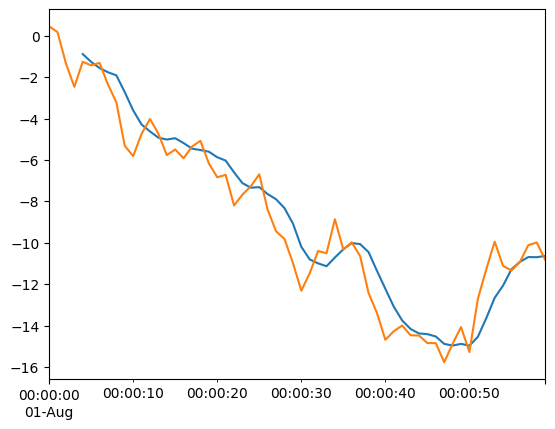

In [87]:
# извлекаем данные по одному 1-минутному интервалу
first_minute = walk['2014-08-01 00:00']

# вычисляем скользящее среднее с шириной окна 5 периодов
means = first_minute.rolling(window=5, center=False).mean()

# сравним средние с исходными данными
means.plot()
first_minute.plot()

<Axes: >

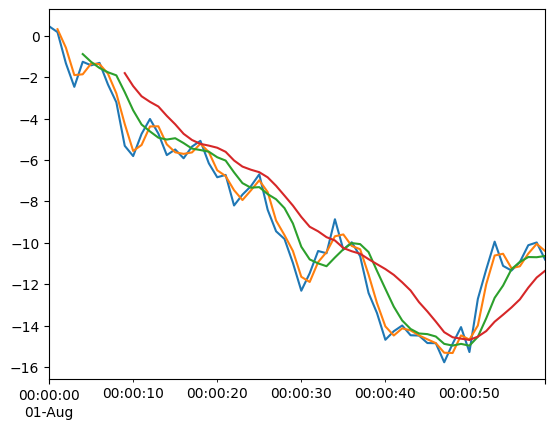

In [88]:
# демонстрируем разницу между скользящими окнами шириной 2, 5 и 10
h1w = walk['2014-08-01 00:00']
means2 = h1w.rolling(window=2, center=False).mean()
means5 = h1w.rolling(window=5, center=False).mean()
means10 = h1w.rolling(window=10, center=False).mean()
h1w.plot()
means2.plot()
means5.plot()
means10.plot()

С помощью метода <mark>.rolling().apply()</mark> к значениям, попавшим в окно, можно
применить любую пользовательскую функцию. Этой функции можно передать
массив значений, попавших в окно, и будет возвращено одно значение. Затем
библиотека pandas объединяет результаты, полученные по каждому окну, во вре-
менной ряд.

<Axes: >

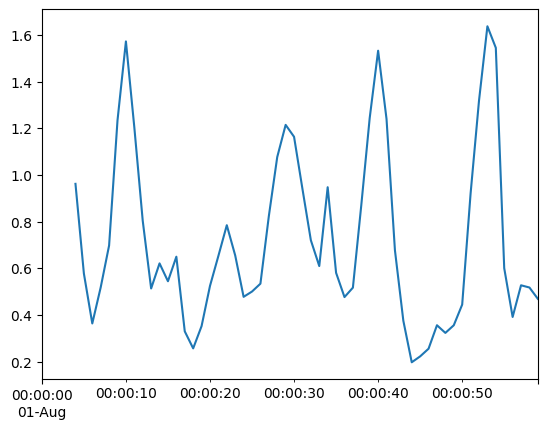

In [89]:
# вычисляем среднее абсолютное значение
# для окна с 5 интервалами
mean_abs_dev = lambda x: np.fabs(x - x.mean()).mean()
def mean_abs_dev_debugg(x):
    return np.fabs(x - x.mean()).mean()

means = h1w.rolling(window=5, center=False).apply(mean_abs_dev, raw=True)
means2 = h1w.rolling(window=5, center=False).apply(mean_abs_dev_debugg, raw=True)
means.plot()

Среднее значение c расширяющимся окном можно вычислить с помощью небольшой
модификации функции pd.rolling_mean, которая многократно вычисляет среднее
значение, всегда начиная с первого значения временного ряда и в каждой итерации
увеличивая размер окна на единицу. 

Среднее с расширяющимся окном будет более стабильным (менее чувствительным)
показателем, чем обычное скользящее среднее, потому что чем больше размер
окна, тем меньше влияние следующего значения

<Axes: >

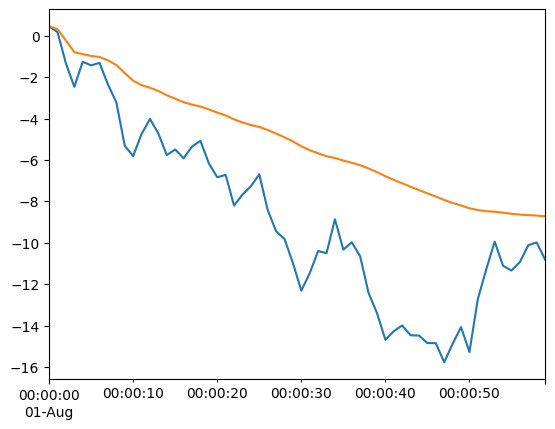

In [93]:
# вычисляем среднее с расширяющимся окном
h1w.plot()
expanding = h1w.expanding(min_periods=1).mean()
expanding.plot()